In [1]:
# 로이터 데이터셋 로드하기
import keras
import numpy as np
from keras.datasets import reuters
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.
C:\Users\LG\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\LG\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\LG\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\LG\Anaconda3\envs\tensorflow\lib

In [2]:
# 코드 3-14 데이터 인코딩하기
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# 레이블 벡터 변환
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [3]:
# keras 내장 함수
from keras.utils.np_utils  import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [4]:
# 코드 3-15 모델 정의하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

W0728 10:05:43.591461  5248 deprecation_wrapper.py:119] From C:\Users\LG\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0728 10:05:43.676251  5248 deprecation_wrapper.py:119] From C:\Users\LG\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0728 10:05:43.705157  5248 deprecation_wrapper.py:119] From C:\Users\LG\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

W0728 10:05:43.797910  5248 deprecation_wrapper.py:119] From C:\Users\LG\Anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0728 10:05:43.840796  5248 deprecation_wrapper.py:119] From C:\Users\LG\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [6]:
# 코드 3-17 검증 세트 준비하기
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [7]:
# 코드 3-18 모델 훈련하기
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

W0728 10:05:44.646640  5248 deprecation.py:323] From C:\Users\LG\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0728 10:05:44.742383  5248 deprecation_wrapper.py:119] From C:\Users\LG\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 409us/step - loss: 2.5241 - acc: 0.4977 - val_loss: 1.7183 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 4s 483us/step - loss: 1.4443 - acc: 0.6888 - val_loss: 1.3500 - val_acc: 0.7090
Epoch 3/20
7982/7982 [==============================] - 3s 407us/step - loss: 1.0991 - acc: 0.7645 - val_loss: 1.1754 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 177us/step - loss: 0.8728 - acc: 0.8160 - val_loss: 1.0809 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 146us/step - loss: 0.7062 - acc: 0.8492 - val_loss: 0.9862 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 1s 133us/step - loss: 0.5696 - acc: 0.8794 - val_loss: 0.9417 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 137us/step - loss: 0.4625 - acc: 0.9033 - val_loss: 0.9076 - val_acc: 0.8030


In [8]:
import matplotlib.pyplot as plt

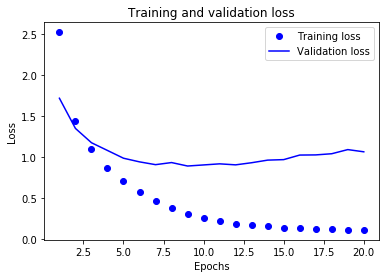

In [9]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [10]:
# 코드 3-21 모델을 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 190us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 149us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 150us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 157us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 146us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 146us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 155us/step - loss: 0.4124 - acc: 0.9139 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8

In [11]:
results

[1.0227517058354665, 0.7756010686194165]

In [12]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.182546749777382

In [13]:
predictions = model.predict(x_test)

In [14]:
predictions[0].shape

(46,)

In [15]:
np.sum(predictions[0])

0.99999976

In [16]:
np.argmax(predictions[0])

3

In [17]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [18]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 6s 727us/step - loss: 2.6570 - acc: 0.3780 - val_loss: 1.9672 - val_acc: 0.5290
Epoch 2/20
7982/7982 [==============================] - 2s 254us/step - loss: 1.6658 - acc: 0.6210 - val_loss: 1.5409 - val_acc: 0.6240
Epoch 3/20
7982/7982 [==============================] - 2s 270us/step - loss: 1.3330 - acc: 0.6708 - val_loss: 1.3942 - val_acc: 0.6800
Epoch 4/20
7982/7982 [==============================] - 3s 361us/step - loss: 1.1425 - acc: 0.7269 - val_loss: 1.3236 - val_acc: 0.6960
Epoch 5/20
7982/7982 [==============================] - 2s 268us/step - loss: 1.0111 - acc: 0.7462 - val_loss: 1.2710 - val_acc: 0.7020
Epoch 6/20
7982/7982 [==============================] - 2s 257us/step - loss: 0.9101 - acc: 0.7582 - val_loss: 1.2736 - val_acc: 0.7090
Epoch 7/20
7982/7982 [==============================] - 2s 223us/step - loss: 0.8308 - acc: 0.7751 - val_loss: 1.2578 - val_acc: 0.7110
